In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset-of-60s.csv')

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


# checking basic integrity

In [4]:
data.shape

(8642, 19)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8642 entries, 0 to 8641
Data columns (total 19 columns):
track               8642 non-null object
artist              8642 non-null object
uri                 8642 non-null object
danceability        8642 non-null float64
energy              8642 non-null float64
key                 8642 non-null int64
loudness            8642 non-null float64
mode                8642 non-null int64
speechiness         8642 non-null float64
acousticness        8642 non-null float64
instrumentalness    8642 non-null float64
liveness            8642 non-null float64
valence             8642 non-null float64
tempo               8642 non-null float64
duration_ms         8642 non-null int64
time_signature      8642 non-null int64
chorus_hit          8642 non-null float64
sections            8642 non-null int64
target              8642 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.3+ MB


# no. of rows = non null values for each column -> no null value

In [6]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


# checking unique records using uri

In [7]:
# extracting exact id
def extract(x):
    splited_list = x.split(':') # spliting text at colons
    return splited_list[2]      # returning third element
    
data['uri'] = data['uri'].apply(extract)  

In [8]:
data.head() #successfully extracted the id

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


# checking for duplicate rows

In [9]:
data['uri'].nunique()

8625

In [10]:
data['uri'].value_counts()

30Y2TmGEuFdIUX6Pm5nCjn    2
0wz1LjDb9ZNEYwOmDJ3Q4b    2
602FffJEffSJnWC8eHDIwv    2
7IS9MwiLJp91PEyoUDazqb    2
4uKyLqJHDjT6mdA22ofxuM    2
                         ..
0GAMEzcrl8gGGbUFbqxnqa    1
4FNSgwlrrgDjkLLSP8sqcs    1
6Jh1r6aDr8Z7jU2zairxW6    1
6EIEGik420HSzQDPJOdp8d    1
0kcEK7YuNNfE7jiTnXS1cm    1
Name: uri, Length: 8625, dtype: int64

In [11]:
data['uri'].value_counts().unique()

array([2, 1], dtype=int64)

In [12]:
dupe_mask = data['uri'].value_counts()==2

In [13]:
dupe_ids = dupe_mask[dupe_mask]
dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 30Y2TmGEuFdIUX6Pm5nCjn    True
 0wz1LjDb9ZNEYwOmDJ3Q4b    True
 602FffJEffSJnWC8eHDIwv    True
 7IS9MwiLJp91PEyoUDazqb    True
 4uKyLqJHDjT6mdA22ofxuM    True
 4Sz8zFchpHQVQVqVyGz5Jb    True
 3tvqPPpXyIgKrm4PR9HCf0    True
 4UcxTnA6C5vCW79PIZ38Vx    True
 1zU2N6UlqvEHfwL6VjNLHf    True
 1uzcPl4GZSU9Ysl1ZcMLTb    True
 602rnDrA59nfIEcX5Qrlcx    True
 4MFU8kCLOQD9nV03Gfvrkn    True
 3Jw2A9SC8zhntx4ON9VabX    True
 0hA8G8smCwi1h1nmxyRqT3    True
 2zF8ro2hX0aEYaqXQdEKW1    True
 7l9DlqEWqgKVDIzWIeoObf    True
 4MRhEMGSsBTaBX8IBNCe1b    True
 Name: uri, dtype: bool>, (17,))

In [14]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['30Y2TmGEuFdIUX6Pm5nCjn',
 '0wz1LjDb9ZNEYwOmDJ3Q4b',
 '602FffJEffSJnWC8eHDIwv',
 '7IS9MwiLJp91PEyoUDazqb',
 '4uKyLqJHDjT6mdA22ofxuM',
 '4Sz8zFchpHQVQVqVyGz5Jb',
 '3tvqPPpXyIgKrm4PR9HCf0',
 '4UcxTnA6C5vCW79PIZ38Vx',
 '1zU2N6UlqvEHfwL6VjNLHf',
 '1uzcPl4GZSU9Ysl1ZcMLTb',
 '602rnDrA59nfIEcX5Qrlcx',
 '4MFU8kCLOQD9nV03Gfvrkn',
 '3Jw2A9SC8zhntx4ON9VabX',
 '0hA8G8smCwi1h1nmxyRqT3',
 '2zF8ro2hX0aEYaqXQdEKW1',
 '7l9DlqEWqgKVDIzWIeoObf',
 '4MRhEMGSsBTaBX8IBNCe1b']

In [15]:
duplicate_index = data.loc[data['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

# We will be removing all the duplication as they are few compared to data

In [16]:
data.drop(duplicate_index,axis=0,inplace=True)
data.shape

(8608, 19)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 8641
Data columns (total 19 columns):
track               8608 non-null object
artist              8608 non-null object
uri                 8608 non-null object
danceability        8608 non-null float64
energy              8608 non-null float64
key                 8608 non-null int64
loudness            8608 non-null float64
mode                8608 non-null int64
speechiness         8608 non-null float64
acousticness        8608 non-null float64
instrumentalness    8608 non-null float64
liveness            8608 non-null float64
valence             8608 non-null float64
tempo               8608 non-null float64
duration_ms         8608 non-null int64
time_signature      8608 non-null int64
chorus_hit          8608 non-null float64
sections            8608 non-null int64
target              8608 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.3+ MB


In [18]:
print("shape of data",data.shape )
print("no. of unique rows",data['uri'].nunique()) # no duplicates

shape of data (8608, 19)
no. of unique rows 8608


In [19]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


# now we will be dropping all the unnecessary columns which contain string which cant be eficiently converted into numerics

In [20]:
data.drop(['track','artist','uri'],axis=1,inplace=True)

In [21]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


# Univariate analysis

<AxesSubplot:xlabel='target', ylabel='count'>

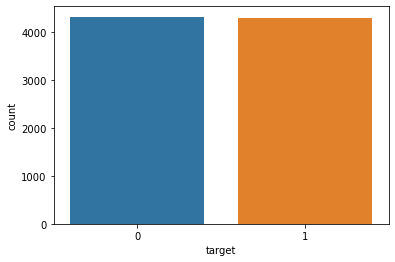

In [22]:
#analysing class imbalance
sns.countplot(data=data,x='target') 

In [23]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [24]:
# checking appropriate data type
data[['danceability', 'energy', 'key', 'loudness']].info() # every feature have appropriate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 8641
Data columns (total 4 columns):
danceability    8608 non-null float64
energy          8608 non-null float64
key             8608 non-null int64
loudness        8608 non-null float64
dtypes: float64(3), int64(1)
memory usage: 656.2 KB


In [25]:
# checking range of first 4 features 
data[['danceability', 'energy', 'key', 'loudness']].describe()

,danceability,energy,key,loudness
count,8608.000000,8608.000000,8608.000000,8608.000000
mean,0.491890,0.444773,5.081901,-12.040208
std,0.162012,0.220229,3.449165,4.997223
min,0.000000,0.000576,0.000000,-41.643000
25%,0.382000,0.280000,2.000000,-14.420750
50%,0.500000,0.436000,5.000000,-11.224000
75%,0.611000,0.607000,8.000000,-8.612750
max,0.922000,0.995000,11.000000,-0.507000


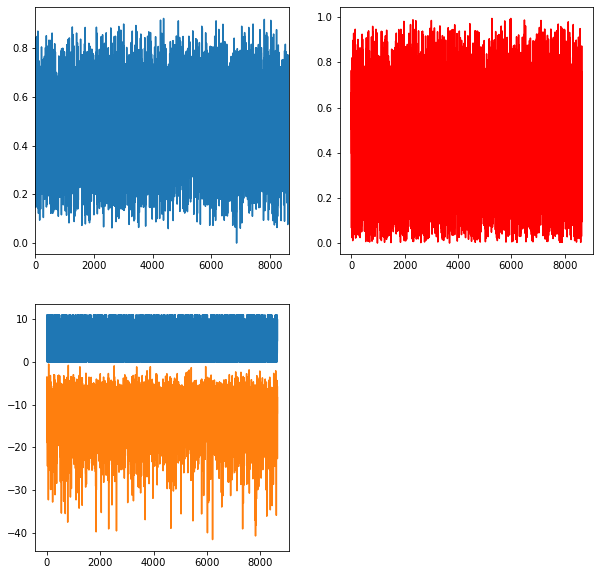

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(data['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(data[['key','loudness']])

#  danceabilty is well inside the range(0,1)
# energy is well inside the range(0,1)
# there's no -1 for keys-> every track has been assigned respective keys
# loudness values are out of range(0,-60)db

In [27]:
loudness_error_idnex = data[data['loudness']>0].index
loudness_error_idnex

Int64Index([], dtype='int64')

In [28]:
 # removing rows with out of range values in loudness column
data.drop(loudness_error_idnex,axis=0, inplace=True)

In [29]:
data.shape  # record is removed 

(8608, 16)

In [30]:
# checking appropriate datatype for next 5 columns
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].info() # datatypes are in acoordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 8641
Data columns (total 5 columns):
mode                8608 non-null int64
speechiness         8608 non-null float64
acousticness        8608 non-null float64
instrumentalness    8608 non-null float64
liveness            8608 non-null float64
dtypes: float64(4), int64(1)
memory usage: 403.5 KB


In [31]:
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].describe() # every feautre is within range

,mode,speechiness,acousticness,instrumentalness,liveness
count,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000
mean,0.755576,0.062491,0.616046,0.150473,0.213772
std,0.429770,0.098574,0.285569,0.302514,0.169620
min,0.000000,0.000000,0.000005,0.000000,0.013600
25%,1.000000,0.032300,0.409000,0.000000,0.103000
50%,1.000000,0.038700,0.684000,0.000042,0.148000
75%,1.000000,0.052900,0.852000,0.037550,0.278000
max,1.000000,0.960000,0.996000,0.999000,0.984000


<AxesSubplot:xlabel='mode', ylabel='count'>

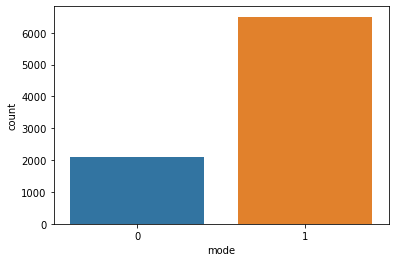

In [32]:
sns.countplot(x=data['mode']) # have only two possible values 0 and 1, no noise in the feature

In [33]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].info() # data type is in accordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 8641
Data columns (total 6 columns):
valence           8608 non-null float64
tempo             8608 non-null float64
duration_ms       8608 non-null int64
time_signature    8608 non-null int64
chorus_hit        8608 non-null float64
sections          8608 non-null int64
dtypes: float64(3), int64(3)
memory usage: 790.8 KB


In [34]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].describe() # all the data are in specified range

,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,8608.000000,8608.000000,8.608000e+03,8608.000000,8608.000000,8608.000000
mean,0.574157,115.113641,1.836390e+05,3.816334,38.912839,8.886617
std,0.273062,29.217616,1.006680e+05,0.527464,17.490509,4.335089
min,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000
25%,0.360000,93.713000,1.410075e+05,4.000000,27.085790,7.000000
50%,0.601000,112.331500,1.627200e+05,4.000000,35.110205,8.000000
75%,0.815000,131.923000,1.932930e+05,4.000000,46.942143,10.000000
max,0.993000,241.009000,2.516987e+06,5.000000,187.495630,109.000000


# Performing F-test to know the relation between every feature and target

In [35]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape,y.shape

((8608, 15), (8608,))

In [37]:
from sklearn.feature_selection import f_classif
f_stat,p_value = f_classif(x,y) 

In [38]:
feat_list = data.iloc[:,:-1].columns.tolist()

In [39]:
# making a dataframe
dict = {'Features':feat_list,'f_statistics':f_stat,'p_value':p_value}
relation = pd.DataFrame(dict)
relation.sort_values(by='p_value')

,Features,f_statistics,p_value
7,instrumentalness,1044.415802,2.320450e-216
9,valence,997.579015,2.926306e-207
3,loudness,950.404802,4.764761e-198
1,energy,842.689297,7.676804e-177
6,acousticness,705.254326,2.005306e-149
0,danceability,509.085046,1.445229e-109
4,mode,338.555370,3.443982e-74
11,duration_ms,285.148110,5.814709e-63
14,sections,165.525303,1.555885e-37
5,speechiness,153.499931,5.910383e-35


# Multivariate analysis

In [40]:
correlation = data.corr()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

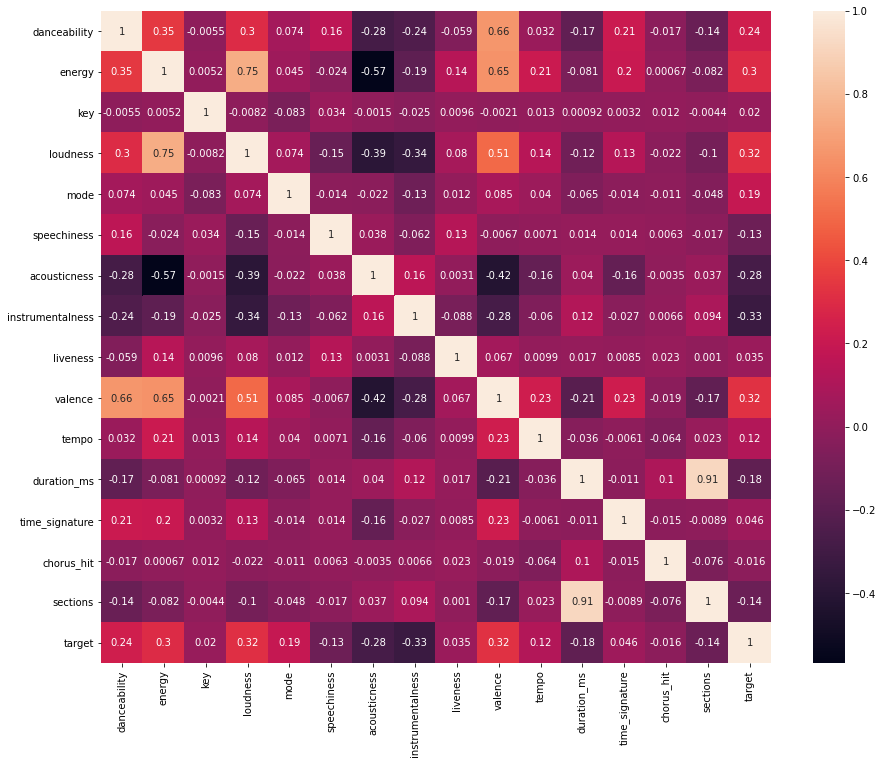

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.tight_layout

# strong features(accordance with f-test) --> 
danceability,  loudness,  acousticness,  instrumentalness,  valence

# less imortant feature(accordance with f-test)-->
duration,  section,  mode,  time_signature,  chorus hit

# least imortant-->  
energy,key,speecheness,liveliness,tempo

In [42]:
data.shape

(8608, 16)